In [1]:
#Работа с текстом

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [ ]:
#Читаем файл и строим словари со словами

In [11]:
with open('One.txt') as mytext:
    words_one = mytext.read().lower().split()
    uni_words_one = set(words_one)

In [12]:
with open('Two.txt') as mytext:
    words_two = mytext.read().lower().split()
    uni_words_two = set(words_two)

In [15]:
all_uni_words = uni_words_one | uni_words_two

In [17]:
full_vocab = {word: index for index, word in enumerate(all_uni_words)} #Получили словарь

In [ ]:
#Создаем 2 списка с частотами встреч слов в файлах

In [33]:
one_freq = [0] * len(full_vocab)
for word in words_one:
    one_freq[full_vocab[word]] += 1

In [34]:
two_freq = [0] * len(full_vocab)
for word in words_two:
    two_freq[full_vocab[word]] += 1

In [36]:
#Создадим список со словами из словаря

In [37]:
all_words = [''] * len(full_vocab)
for word in full_vocab:
    all_words[full_vocab[word]] += word

In [39]:
#Создаем DataFrame

In [41]:
bow = pd.DataFrame(data=[one_freq, two_freq], columns=all_words)

In [42]:
bow

,fun,a,pets,catching,furry,our,story,is,animals,dogs,are,sport,this,popular,surfing,about,water,waves,canine
0,0,1,1,0,1,1,1,1,1,2,1,0,1,0,0,1,0,0,1
1,1,1,0,1,0,0,1,3,0,0,0,1,1,1,2,1,1,1,0


In [43]:
#С использованием sklearn

In [69]:
text = ['This is a line',
        'This is another line',
        'Completely different line']

In [70]:
cv = CountVectorizer() #stop_words='english' -Исключились незначимые слова

In [71]:
sparse_matrix = cv.fit_transform(text)

In [72]:
sparse_matrix.todense() #bow матрица

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

In [60]:
cv.vocabulary_ #Словарь ('слово': индекс)

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [61]:
tfidf = TfidfTransformer()

In [62]:
results = tfidf.fit_transform(sparse_matrix) #Счетчики TF-IDF

In [64]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [66]:
tv = TfidfVectorizer()

In [67]:
tv_results = tv.fit_transform(text)

In [68]:
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [76]:
#Классификация текста

In [3]:
df = pd.read_csv('../DATA/airline_tweets.csv')

In [79]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [86]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

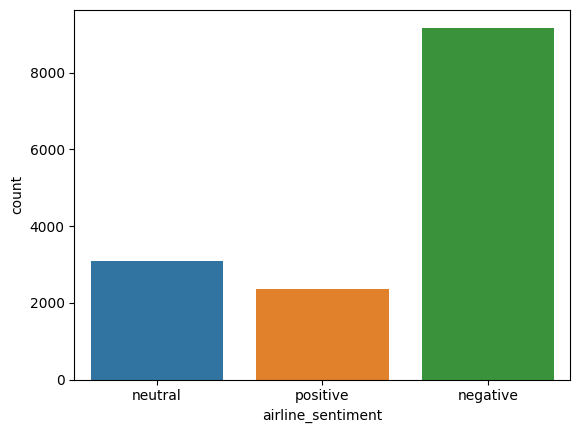

In [88]:
sns.countplot(data=df, x='airline_sentiment', hue='airline_sentiment')

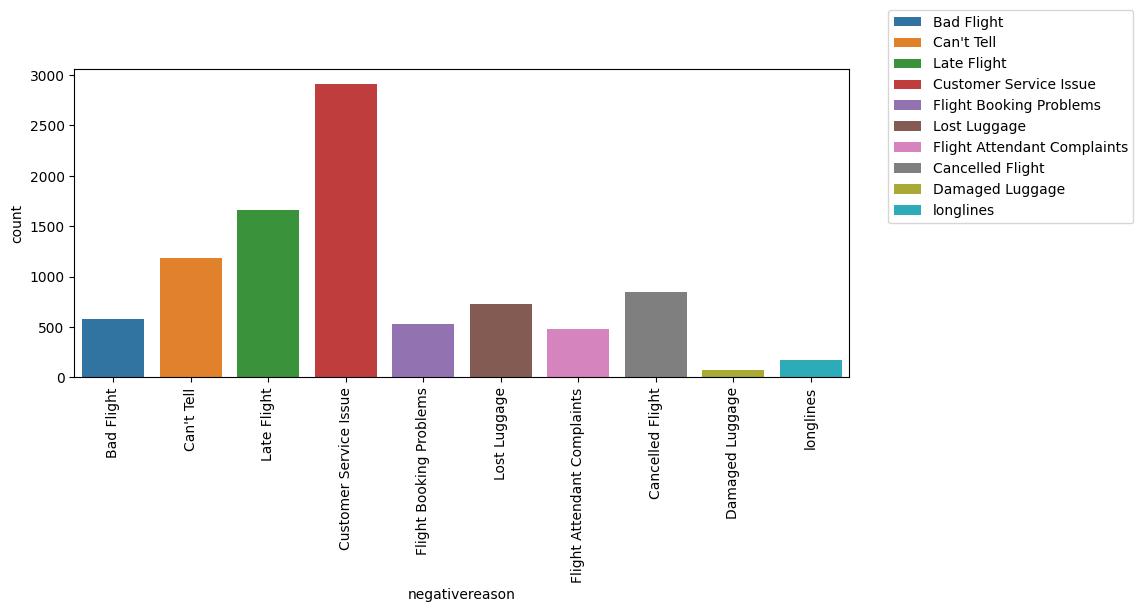

In [97]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data=df, x='negativereason', hue='negativereason')
plt.xticks(rotation=90)
plt.legend(loc=(1.05,0.5))

<Axes: xlabel='airline', ylabel='count'>

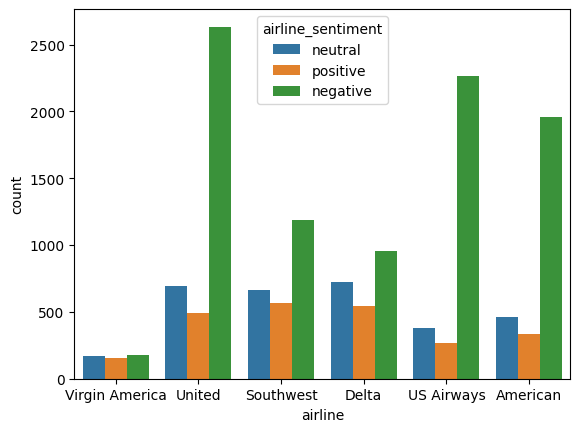

In [98]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

In [4]:
data = df[['airline_sentiment', 'text']]

In [5]:
X = data['text']
y = data['airline_sentiment']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
tfidf = TfidfVectorizer(stop_words='english')

In [8]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [9]:
#Построили нормированные матрицы метрик TF-IDF
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# TF = (Кол-во k-ых слов в документе) / (Кол-во слов в документе)
# IDF = ln((Кол-во документов) / (Кол-во документов с k-ым словом))
# TF-IDF = TF * IDF

In [11]:
nb = MultinomialNB()

In [12]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [15]:
log_model = LogisticRegression(max_iter=1000)

In [16]:
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [18]:
rbf_svc = SVC()

In [19]:
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [20]:
linear_svc = LinearSVC()

In [21]:
linear_svc.fit(X_train_tfidf, y_train)

C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [25]:
def report(model):
    y_redict = model.predict(X_test_tfidf)
    print(classification_report(y_test, y_redict))
    ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



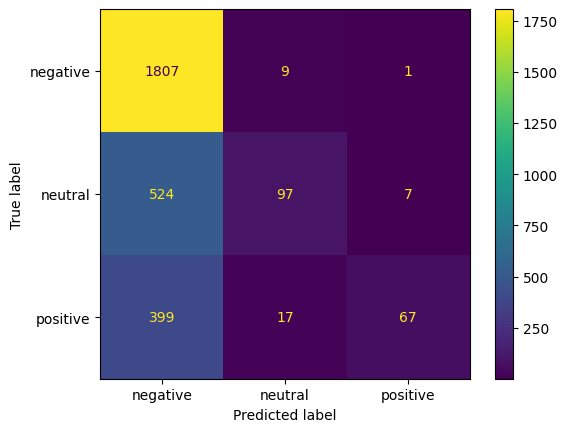

In [26]:
report(nb) #Видим хорошие результаты для Negative, что нам и надо. Однако нам повезло, что в данных больше 
           #негативных отзывов, на самом же деле модель плохо предсказывает тип отзыва, видим это по Neutral и Positive

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



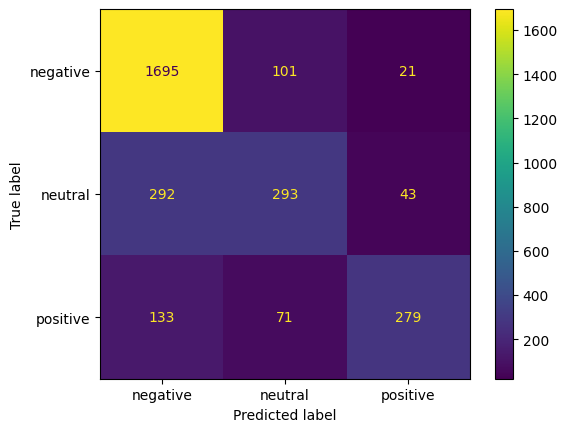

In [27]:
report(log_model) #Получаем более лучшие результаты в целом

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



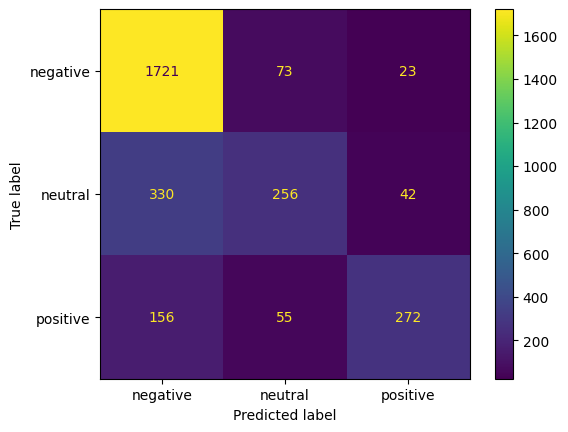

In [28]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



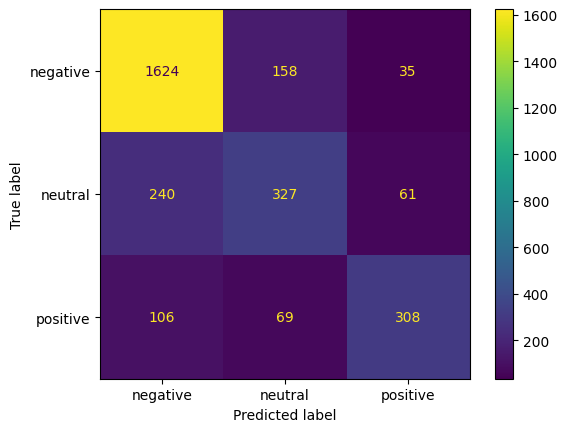

In [29]:
report(linear_svc)

In [30]:
#Создание Pipeline

In [32]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [33]:
pipe.fit(X, y)

C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [34]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [39]:
pipe.predict(['hard'])

array(['negative'], dtype=object)